In [2]:
import numpy as np
import pandas as pd
from pathlib import Path


In [3]:
#Import plotting means 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_dir = "/Users/emili/OneDrive/Documentos/LSE MPA DSPP/AT 2025/Capstone/Mineral Price Volatility/Raw Data/"
files = Path(data_dir).glob("ds140-*.xlsx")

# Dictionary to store cleaned dataframes
dataframes = {}

for file in files:
    mineral_name = file.stem.split('-')[1]
    
    # Read the dataframe
    df = pd.read_excel(file, skiprows=4)
    
    # Remove last 3 rows
    df = df.iloc[:-3]
    
    # Select only the columns you need
    df = df[['Year', 'Unit value ($/t)']]
    
    # Add a column with the mineral name
    df['Metal'] = mineral_name
    
    # Store in dictionary
    dataframes[mineral_name] = df
    
    print(f"Loaded {mineral_name}: {len(df)} rows")

Loaded bauxite: 122 rows
Loaded cobalt: 122 rows
Loaded copper: 121 rows
Loaded gold: 123 rows
Loaded graphite: 123 rows
Loaded iron_ore: 122 rows
Loaded lead: 122 rows
Loaded lithium: 122 rows
Loaded manganese: 123 rows
Loaded nickel: 121 rows
Loaded phosphate: 123 rows
Loaded platinum: 123 rows
Loaded rare: 121 rows
Loaded silver: 122 rows
Loaded tin: 122 rows
Loaded vanadium: 122 rows
Loaded zinc: 123 rows


In [4]:
all_minerals = pd.concat(dataframes.values(), ignore_index=True)

# Now you have one dataframe with all minerals
print(all_minerals.head())
print(all_minerals['Metal'].unique())  # See all mineral names

   Year  Unit value ($/t)    Metal
0  1900              3.75  bauxite
1  1901              3.60  bauxite
2  1902              3.40  bauxite
3  1903              3.29  bauxite
4  1904              3.15  bauxite
['bauxite' 'cobalt' 'copper' 'gold' 'graphite' 'iron_ore' 'lead' 'lithium'
 'manganese' 'nickel' 'phosphate' 'platinum' 'rare' 'silver' 'tin'
 'vanadium' 'zinc']


In [5]:
# Remove duplicates before pivoting
all_minerals_clean = all_minerals.drop_duplicates(subset=['Metal', 'Year'], keep='first')

# Now pivot
wide_df = all_minerals_clean.pivot(index='Metal', columns='Year', values='Unit value ($/t)')

In [6]:
rolling_avg_df = wide_df.rolling(window=3, axis=1, min_periods=1).mean()

C:\Users\emili\AppData\Local\Temp\ipykernel_38368\3045394682.py:1: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  rolling_avg_df = wide_df.rolling(window=3, axis=1, min_periods=1).mean()


In [7]:
# For the wide dataframe
wide_df = wide_df.loc[:, 1990:]

# For the rolling average dataframe
rolling_avg_df = rolling_avg_df.loc[:, 1990:]

In [8]:
rolling_avg_df

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Metal,,,,,,,,,,,,,,,,,,,,,
bauxite,2.596667e+01,2.813333e+01,2.873333e+01,2.893333e+01,2.733333e+01,2.563333e+01,2.530000e+01,2.486667e+01,2.450000e+01,2.256667e+01,...,2.883333e+01,2.756667e+01,2.726667e+01,2.746667e+01,2.906667e+01,3.036667e+01,3.176667e+01,3.130000e+01,3.100000e+01,3.035000e+01
cobalt,1.723333e+04,2.020000e+04,3.023333e+04,3.460000e+04,4.030000e+04,4.393333e+04,5.230000e+04,5.366667e+04,4.896667e+04,4.140000e+04,...,3.150000e+04,2.966667e+04,2.923333e+04,2.843333e+04,3.436667e+04,4.590000e+04,5.003333e+04,4.540000e+04,3.906667e+04,3.965000e+04
copper,2.753333e+03,2.670000e+03,2.496667e+03,2.266667e+03,2.280000e+03,2.506667e+03,2.633333e+03,2.603333e+03,2.163333e+03,1.920000e+03,...,8.180000e+03,7.533333e+03,6.716667e+03,5.873333e+03,5.633333e+03,5.946667e+03,6.346667e+03,6.356667e+03,6.240000e+03,6.320000e+03
gold,1.293333e+07,1.213333e+07,1.173333e+07,1.146667e+07,1.170000e+07,1.213333e+07,1.243333e+07,1.186667e+07,1.089667e+07,9.730000e+06,...,4.996667e+07,4.670000e+07,4.123333e+07,3.950000e+07,3.940000e+07,4.056667e+07,4.210000e+07,4.760000e+07,5.326667e+07,5.760000e+07
graphite,5.578333e+02,6.299667e+02,6.207000e+02,5.779000e+02,5.308333e+02,5.251000e+02,5.127000e+02,5.297333e+02,5.527667e+02,5.822333e+02,...,1.163333e+03,1.133333e+03,1.146667e+03,1.170000e+03,1.200000e+03,1.087667e+03,1.054333e+03,1.091000e+03,1.233333e+03,1.556667e+03
iron_ore,3.129000e+01,3.110000e+01,3.040333e+01,2.839000e+01,2.669333e+01,2.573333e+01,2.706667e+01,2.896667e+01,2.991333e+01,2.923667e+01,...,1.026667e+02,9.611000e+01,8.434667e+01,7.957667e+01,7.761333e+01,8.155000e+01,8.816000e+01,9.240333e+01,1.086633e+02,1.165250e+02
lead,8.990000e+02,8.726667e+02,8.410000e+02,7.373333e+02,7.643333e+02,8.173333e+02,9.443333e+02,1.014333e+03,1.036333e+03,9.973333e+02,...,2.543333e+03,2.426667e+03,2.256667e+03,2.143333e+03,2.203333e+03,2.350000e+03,2.390000e+03,2.220000e+03,2.233333e+03,2.250000e+03
lithium,3.810000e+03,4.016667e+03,4.186667e+03,4.246667e+03,4.313333e+03,4.320000e+03,4.363333e+03,4.386667e+03,4.433333e+03,4.476667e+03,...,4.160000e+03,4.373333e+03,4.480000e+03,4.656667e+03,4.786667e+03,5.706667e+03,6.743333e+03,7.243333e+03,6.876667e+03,6.300000e+03
manganese,5.937708e+02,7.005912e+02,7.163705e+02,6.887423e+02,6.204097e+02,6.020000e+02,6.170000e+02,6.280000e+02,6.253333e+02,5.870000e+02,...,1.350000e+03,1.306667e+03,1.220000e+03,1.130000e+03,1.160000e+03,1.280000e+03,1.406667e+03,1.303333e+03,1.276667e+03,1.510000e+03


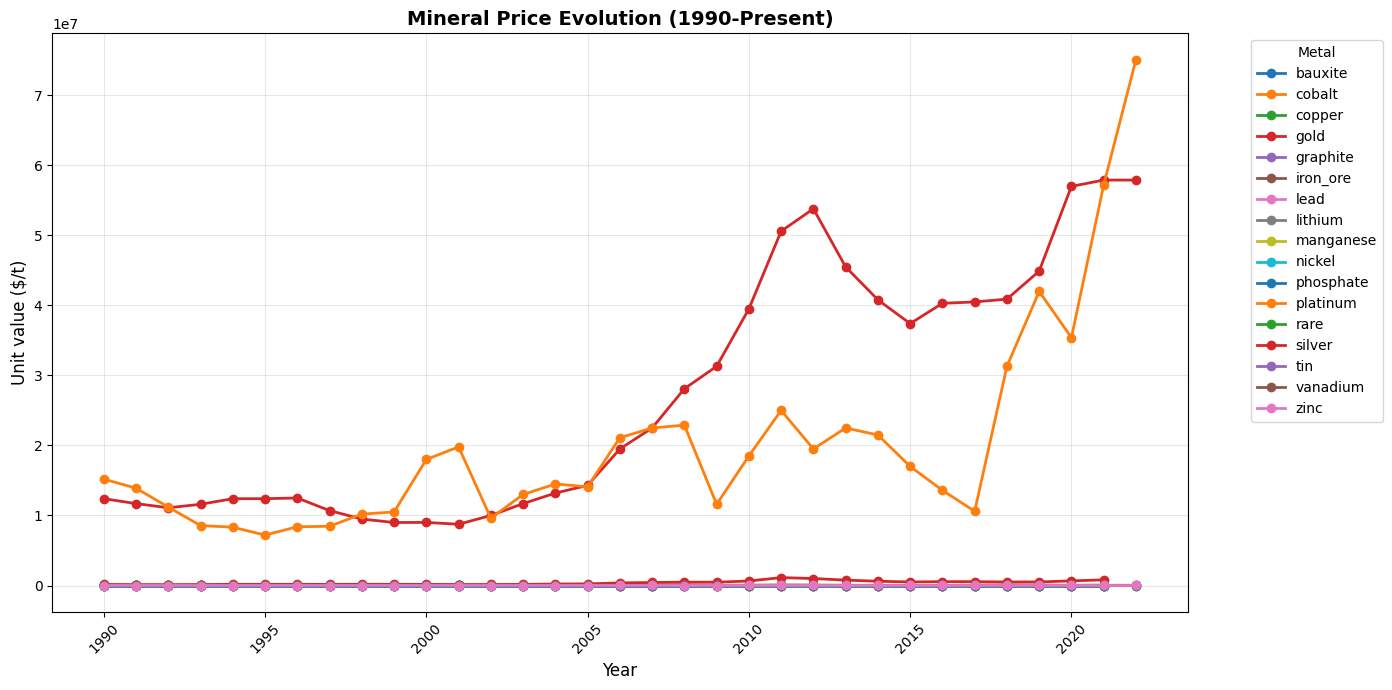

In [9]:
plt.figure(figsize=(14, 7))

for metal in wide_df.index:
    plt.plot(wide_df.columns, wide_df.loc[metal], marker='o', label=metal, linewidth=2)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Unit value ($/t)', fontsize=12)
plt.title('Mineral Price Evolution (1990-Present)', fontsize=14, fontweight='bold')
plt.legend(title='Metal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

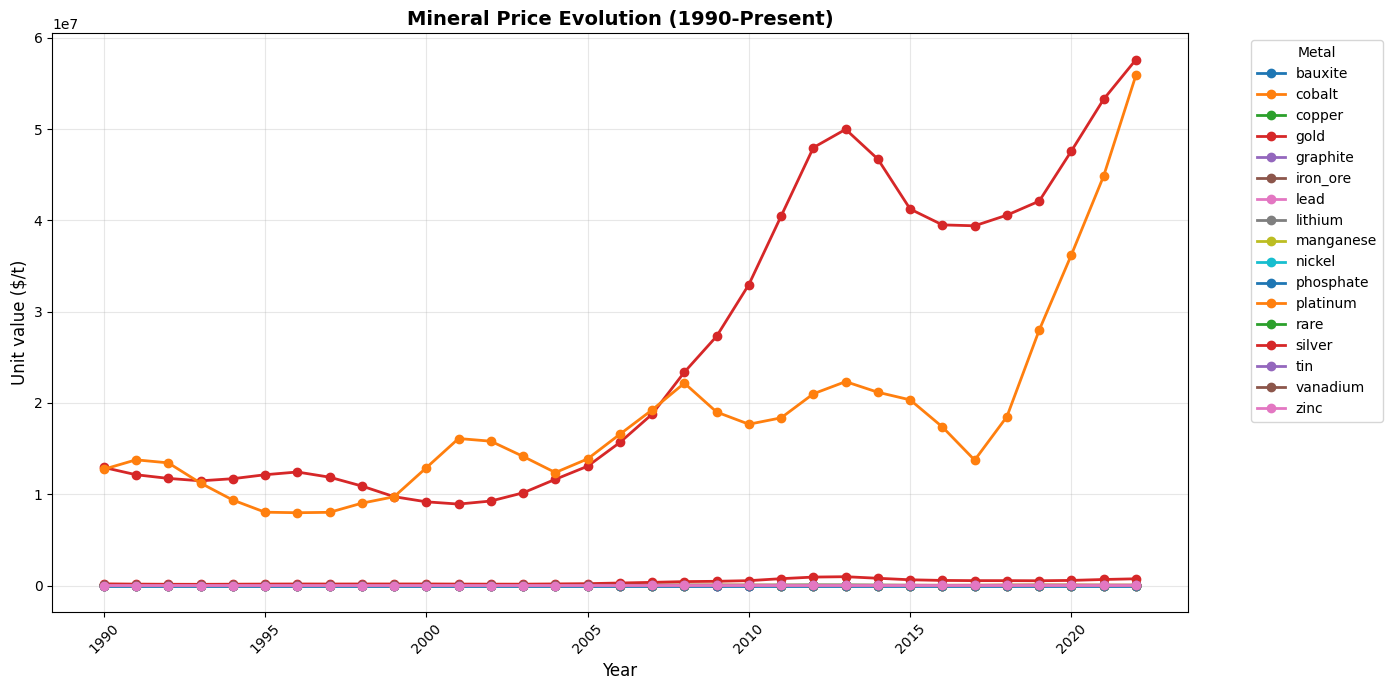

In [10]:
plt.figure(figsize=(14, 7))

for metal in rolling_avg_df.index:
    plt.plot(rolling_avg_df.columns, rolling_avg_df.loc[metal], marker='o', label=metal, linewidth=2)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Unit value ($/t)', fontsize=12)
plt.title('Mineral Price Evolution (1990-Present)', fontsize=14, fontweight='bold')
plt.legend(title='Metal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

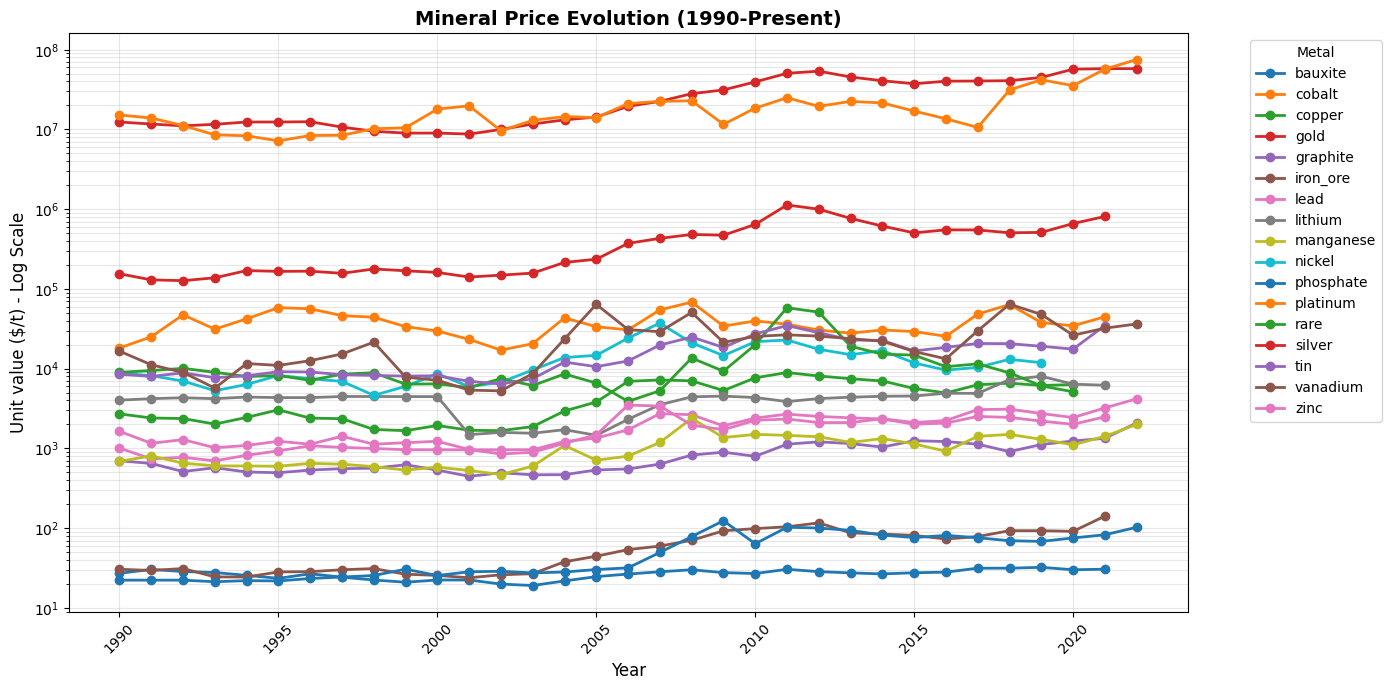

In [11]:
# Transpose so years are on x-axis and each metal is a line
plt.figure(figsize=(14, 7))

for metal in wide_df.index:
    plt.plot(wide_df.columns, wide_df.loc[metal], marker='o', label=metal, linewidth=2)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Unit value ($/t) - Log Scale', fontsize=12)
plt.title('Mineral Price Evolution (1990-Present)', fontsize=14, fontweight='bold')
plt.yscale('log')  # This is the key line!
plt.legend(title='Metal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, which='both')  # Show grid for both major and minor ticks
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
import plotly.graph_objects as go

fig = go.Figure()

for metal in wide_df.index:
    fig.add_trace(go.Scatter(
        x=wide_df.columns,
        y=wide_df.loc[metal],
        mode='lines+markers',
        name=metal.capitalize(),
        line=dict(width=2),
        opacity=0.7,  # Default opacity
        hovertemplate='<b>%{fullData.name}</b><br>Year: %{x}<br>Price: $%{y:,.0f}/t<extra></extra>'
    ))

fig.update_layout(
    title='Mineral Price Evolution (1990-Present)',
    xaxis_title='Year',
    yaxis_title='Unit value ($/t) - Log Scale',
    yaxis_type='log',
    hovermode='closest',
    width=1200,
    height=700,
    legend=dict(title='Metal (click to toggle)', x=1.01, y=0.99)
)

# Grid
fig.update_xaxes(showgrid=True, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridcolor='LightGray')

fig.show()

In [16]:
import plotly.graph_objects as go

fig = go.Figure()

# Define a professional color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
          '#c49c94', '#f7b6d2']

for idx, metal in enumerate(wide_df.index):
    fig.add_trace(go.Scatter(
        x=wide_df.columns,
        y=wide_df.loc[metal],
        mode='lines+markers',
        name=metal.capitalize(),
        line=dict(width=2.5, color=colors[idx % len(colors)]),
        marker=dict(size=5),
        hovertemplate='<b>%{fullData.name}</b><br>Year: %{x}<br>Price: $%{y:,.0f}/t<extra></extra>'
    ))

fig.update_layout(
    title=dict(
        text='Mineral Price Evolution (1990-Present)',
        font=dict(size=18, color='#333333', family='Arial')
    ),
    xaxis_title='Year',
    yaxis_title='Unit value ($/t) - Log Scale',
    yaxis_type='log',
    hovermode='closest',
    width=1200,
    height=700,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=12, color='#333333'),
    legend=dict(
        title=dict(text='Metal (click to toggle)', font=dict(size=12)),
        x=1.01, 
        y=0.99,
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='#cccccc',
        borderwidth=1
    )
)

# Clean grid
fig.update_xaxes(
    showgrid=True, 
    gridcolor='#e0e0e0',
    gridwidth=0.5,
    showline=True,
    linewidth=1,
    linecolor='#333333',
    mirror=True
)

fig.update_yaxes(
    showgrid=True, 
    gridcolor='#e0e0e0',
    gridwidth=0.5,
    showline=True,
    linewidth=1,
    linecolor='#333333',
    mirror=True
)

fig.show()

In [17]:
rolling_avg_df.to_excel('/Users/emili/OneDrive/Documentos/LSE MPA DSPP/AT 2025/Capstone/Mineral Price Volatility/mineral_prices_3yr_rolling_avg.xlsx')

In [18]:
fig.write_html('/Users/emili/OneDrive/Documentos/LSE MPA DSPP/AT 2025/Capstone/Mineral Price Volatility/mineral_prices_interactive.html')

In [19]:
wide_df.to_excel('/Users/emili/OneDrive/Documentos/LSE MPA DSPP/AT 2025/Capstone/Mineral Price Volatility/mineral_prices.xlsx')

# Coal Gas Oil and Uranium Prices

In [59]:
cgou_prices = pd.read_excel('/Users/emili/OneDrive/Documentos/LSE MPA DSPP/AT 2025/Capstone/Mineral Price Volatility/Oil Gas Coal Uranium Price.xlsx')

In [60]:
cgou_prices['Gas'] = cgou_prices[['Gas (Henry Hub)', 'Gas (TTF)', 'Gas (JKM)']].apply(
    lambda row: np.nanmean(row), axis=1
)

C:\Users\emili\AppData\Local\Temp\ipykernel_38368\426200250.py:2: RuntimeWarning:

Mean of empty slice



In [61]:
wide_cgou_prices = cgou_prices.set_index('Year').T.reset_index()
wide_cgou_prices.columns.name = None  # Remove the 'Year' name from columns
wide_cgou_prices = wide_cgou_prices.rename(columns={'Year': 'Commodity'})

In [63]:
wide_cgou_prices = wide_cgou_prices.rename(columns={'index': 'Natural Resource'})

In [64]:
wide_cgou_prices = wide_cgou_prices.set_index('Natural Resource')

In [66]:
wide_cgou_prices = wide_cgou_prices.loc[:, 1990:]

In [68]:
natural_resource_prices = pd.concat([wide_df,wide_cgou_prices], ignore_index=False)

In [69]:
natural_resource_prices

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
bauxite,27.2,30.4,28.6,27.8,25.6,23.5,26.8,24.3,22.4,21.0,...,27.6,28.1,31.5,31.5,32.3,30.1,30.6,NaN,NaN,NaN
cobalt,18200.0,25100.0,47400.0,31300.0,42200.0,58300.0,56400.0,46300.0,44200.0,33700.0,...,29200.0,25500.0,48400.0,63800.0,37900.0,34500.0,44800.0,NaN,NaN,NaN
copper,2710.0,2410.0,2370.0,2020.0,2450.0,3050.0,2400.0,2360.0,1730.0,1670.0,...,5650.0,4960.0,6290.0,6590.0,6160.0,6320.0,NaN,NaN,NaN,NaN
gold,12400000.0,11700000.0,11100000.0,11600000.0,12400000.0,12400000.0,12500000.0,10700000.0,9490000.0,9000000.0,...,37400000.0,40300000.0,40500000.0,40900000.0,44900000.0,57000000.0,57900000.0,57900000.0,NaN,NaN
graphite,701.2,647.8,513.1,572.8,506.6,495.9,535.6,557.7,565.0,624.0,...,1250.0,1220.0,1130.0,913.0,1120.0,1240.0,1340.0,2090.0,NaN,NaN
iron_ore,30.54,29.49,31.18,24.5,24.4,28.3,28.5,30.1,31.14,26.47,...,81.19,73.11,78.54,93.0,92.94,91.27,141.78,NaN,NaN,NaN
lead,1010.0,739.0,774.0,699.0,820.0,933.0,1080.0,1030.0,999.0,963.0,...,2010.0,2080.0,2520.0,2450.0,2200.0,2010.0,2490.0,NaN,NaN,NaN
lithium,4030.0,4210.0,4320.0,4210.0,4410.0,4340.0,4340.0,4480.0,4480.0,4470.0,...,4540.0,4920.0,4900.0,7300.0,8030.0,6400.0,6200.0,NaN,NaN,NaN
manganese,687.884462,806.997722,654.229249,605.0,602.0,599.0,650.0,635.0,591.0,535.0,...,1140.0,920.0,1420.0,1500.0,1300.0,1110.0,1420.0,2000.0,NaN,NaN
nickel,8860.0,8160.0,7000.0,5290.0,6340.0,8230.0,7500.0,6930.0,4630.0,6010.0,...,11800.0,9590.0,10400.0,13100.0,11900.0,NaN,NaN,NaN,NaN,NaN


In [70]:
natural_resource_prices.to_excel('/Users/emili/OneDrive/Documentos/LSE MPA DSPP/AT 2025/Capstone/Mineral Price Volatility/natural resource prices.xlsx')

# Add prices to production values

In [43]:
production_values = pd.read_csv('/Users/emili/OneDrive/Documentos/LSE MPA DSPP/AT 2025/Capstone/Mineral Price Volatility/natural_resources_combined.csv')

In [44]:
production_values['Resource'].unique()

array(['Oil', 'Natural Gas', 'Coal', 'Lithium', 'Cobalt', 'Nickel', 'Tin',
       'Bauxite', 'Natural Graphite', 'Copper', 'Aluminium', 'Zinc',
       'Manganese', 'Rare Earth', 'Platinum Group', 'Vanadium'],
      dtype=object)

In [45]:
natural_resource_prices = pd.read_excel('/Users/emili/OneDrive/Documentos/LSE MPA DSPP/AT 2025/Capstone/Mineral Price Volatility/natural resource prices.xlsx')

In [46]:
natural_resource_prices_long = natural_resource_prices.reset_index().melt(id_vars='Resource', 
                                  var_name='year', 
                                  value_name='price')

In [47]:
natural_resource_prices_long = natural_resource_prices_long[natural_resource_prices_long['year'] != 'index']

In [48]:
natural_resource_prices_long = natural_resource_prices_long.rename(columns={'year': 'Year',
                                                                            'price' : 'Price'})

In [49]:
production_values_w_prices = production_values.merge(natural_resource_prices_long, on=['Resource', 'Year'], how='left')

In [50]:
production_values_w_prices.to_csv('/Users/emili/OneDrive/Documentos/LSE MPA DSPP/AT 2025/Capstone/Mineral Price Volatility/production_values_w_prices.csv')